## Mapa Coroplético: Secuestros en Colombia por Departamentos

### Librerias

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np

### GeoJSON de Colombia

In [2]:
# Mapa de colombia
map_df = gpd.read_file('./Mapas/Colombia.geo.json')
map_df.head()

,DPTO,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry
0,05,ANTIOQUIA,6.335186e+10,1963728.843,6335185.555,"POLYGON ((-76.30730 8.61930, -76.29810 8.61640..."
1,08,ATLANTICO,3.360765e+09,240936.172,336076.535,"POLYGON ((-74.87060 10.36120, -74.87640 10.343..."
2,11,SANTAFE DE BOGOTA D.C,1.650948e+09,323322.540,165094.778,"POLYGON ((-74.02290 4.79510, -74.02640 4.78360..."
3,13,BOLIVAR,2.614189e+10,1309427.968,2614189.453,"POLYGON ((-75.15950 10.42360, -75.15430 10.409..."
4,15,BOYACA,2.335258e+10,1364539.911,2335258.246,"POLYGON ((-72.21300 7.02750, -72.20610 7.02460..."


### Secuestros por Departamentos

In [3]:
# Datos de Secuestros por departamentos
dfSecuestrosDepartamentos= pd.read_csv('./Datasets/SecuestrosPorDepartamentos.csv')
dfSecuestrosDepartamentos.head()

,DEPARTAMENTO,TOTAL_VICTIMAS
0,AMAZONAS,43
1,ANTIOQUIA,9212
2,ARAUCA,986
3,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",39
4,ATLÁNTICO,824


### Agregar Datos de Victimas al Mapa

para asi crear un mapa coroplético

In [4]:
merged = map_df.set_index('NOMBRE_DPT').join(dfSecuestrosDepartamentos.set_index('DEPARTAMENTO'))
merged['TOTAL_VICTIMAS']=merged['TOTAL_VICTIMAS'].apply(lambda x: 0 if np.isnan(x) else x)
merged.head()

,DPTO,AREA,PERIMETER,HECTARES,geometry,TOTAL_VICTIMAS
NOMBRE_DPT,,,,,,
ANTIOQUIA,05,6.335186e+10,1963728.843,6335185.555,"POLYGON ((-76.30730 8.61930, -76.29810 8.61640...",9212.0
ATLANTICO,08,3.360765e+09,240936.172,336076.535,"POLYGON ((-74.87060 10.36120, -74.87640 10.343...",0.0
SANTAFE DE BOGOTA D.C,11,1.650948e+09,323322.540,165094.778,"POLYGON ((-74.02290 4.79510, -74.02640 4.78360...",0.0
BOLIVAR,13,2.614189e+10,1309427.968,2614189.453,"POLYGON ((-75.15950 10.42360, -75.15430 10.409...",0.0
BOYACA,15,2.335258e+10,1364539.911,2335258.246,"POLYGON ((-72.21300 7.02750, -72.20610 7.02460...",3404.0


### Dibujar el Mapa

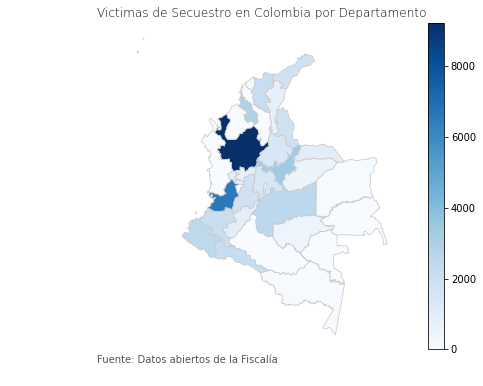

In [5]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'TOTAL_VICTIMAS'
# set the range for the choropleth
vmin, vmax = 0, 9212
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Victimas de Secuestro en Colombia por Departamento', \
              fontdict={'fontsize': '12',
                        'fontweight' : '4'})

# create an annotation for the  data source
ax.annotate('Fuente: Datos abiertos de la Fiscalía',
           xy=(0.2, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('./Mapas/VictimasSecuestroDepartamento.png', dpi=240)